In [86]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pd
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [87]:
# Load the different files
df_marketing = pd.DataFrame(pd.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pd.DataFrame(pd.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

In [88]:
df_clients.shape

(100000, 7)

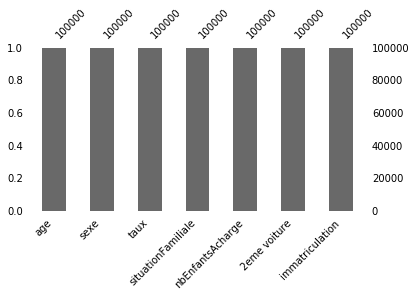

In [89]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [90]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pd.get_dummies(df_clients['sexe'])
df_clients = pd.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [91]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pd.get_dummies(df_clients['situationFamiliale'])
df_clients = pd.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [92]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [93]:
#df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [94]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [95]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [96]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?') & (df_clients.taux != '-1'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


In [97]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?') & (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?', '-1'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


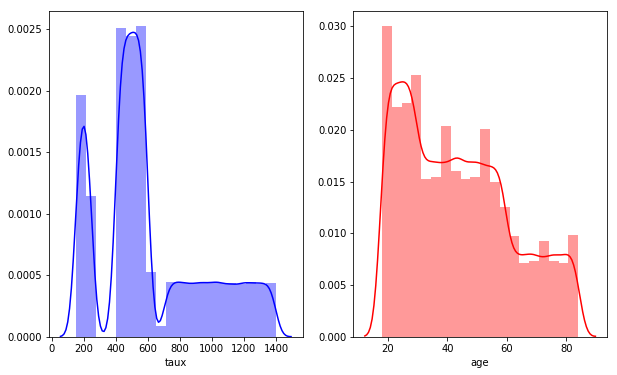

In [98]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [99]:
df_imma_copy = df_clients['immatriculation'].copy()
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [100]:
df_clients.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,43.710880,609.807481,1.25189,0.130750,0.297490,0.699420,0.353500,0.63994,0.006560
std,18.216331,334.599826,1.39054,0.337128,0.457156,0.458513,0.478059,0.48002,0.080728
min,18.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,28.000000,422.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,42.000000,523.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
75%,56.000000,826.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,84.000000,1399.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002170D02E710>], dtype=object)

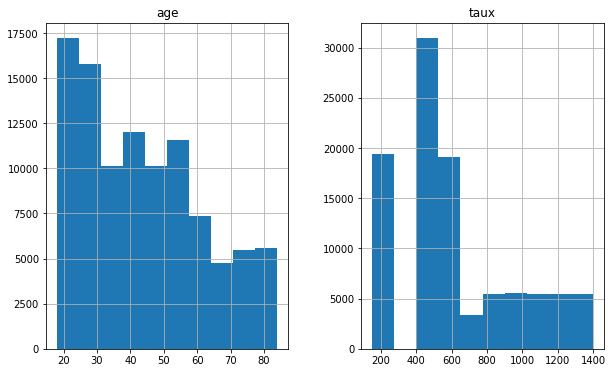

In [101]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()

df_clients.hist(column="age", ax=ax1)
df_clients.hist(column="taux", ax=ax2)

In [102]:
#df_clients['age'] = pan.qcut(df_clients['age'],5,labels=[0,1,2,3,4]).astype(int)
#df_clients['taux'] = pan.qcut(df_clients['taux'],5,labels=[0,1,2,3,4]).astype(int)

print(df_clients['age'].value_counts())
print(df_clients['taux'].value_counts())

29    2527
19    2525
20    2497
28    2488
26    2487
27    2483
24    2481
25    2475
21    2447
18    2433
23    2424
22    2409
43    1978
59    1767
35    1754
49    1722
40    1714
39    1708
45    1699
50    1699
36    1689
47    1684
33    1683
52    1679
51    1675
32    1674
31    1673
56    1672
38    1671
48    1670
      ... 
54    1634
41    1628
53    1628
58    1618
57    1612
76     866
81     837
80     828
61     827
69     822
68     818
82     818
64     807
66     802
62     802
83     801
73     798
84     797
67     796
70     786
77     784
63     779
74     772
75     763
79     760
71     759
78     753
60     752
65     751
72     731
Name: age, Length: 67, dtype: int64
544.0     295
448.0     284
555.0     282
402.0     282
509.0     279
521.0     278
497.0     277
501.0     277
576.0     275
586.0     275
453.0     273
439.0     272
546.0     272
424.0     271
590.0     271
455.0     271
577.0     271
423.0     270
572.0     270
594.0     269
409.0     269

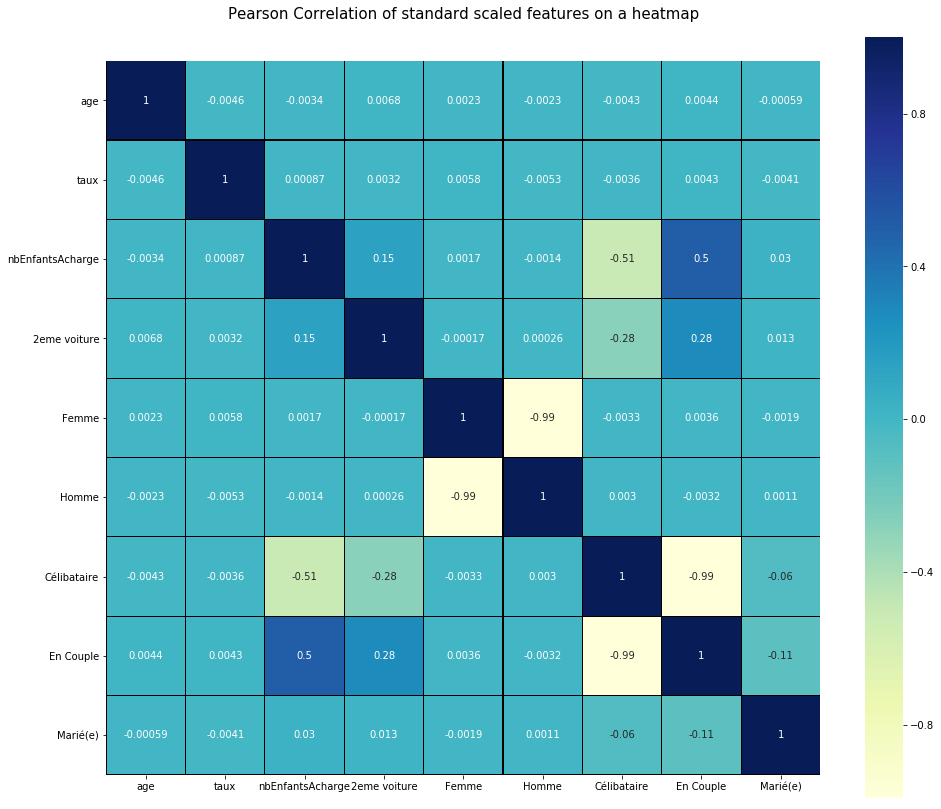

In [103]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(16, 14))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='black', annot=True, cmap="YlGnBu")

In [104]:
df_clients.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [105]:
df_clients = pd.concat([df_clients, df_imma_copy], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation
0,44,476.0,0,0,0,1,0,1,0,3176 TS 67
1,20,422.0,2,0,0,1,0,1,0,3721 QS 49
2,49,221.0,0,0,1,0,1,0,0,9099 UV 26
3,57,246.0,0,0,0,1,1,0,0,3563 LA 55
4,58,1149.0,0,0,0,1,1,0,0,6963 AX 34


In [106]:
df_imma_cluster = pd.DataFrame(pd.read_csv('../input/immatriculation_and_cluster.csv', encoding="ISO-8859-1"))
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,1
1,3721 QS 49,4
2,9099 UV 26,1
3,3563 LA 55,3
4,6963 AX 34,3


In [107]:
# ajout du cluster de leur véhicule
df_clients = df_clients.merge(df_imma_cluster, left_on="immatriculation", right_on="immatriculation", how="inner")
df_clients = df_clients.drop(['immatriculation'], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster_predicted
0,44,476.0,0,0,0,1,0,1,0,1
1,20,422.0,2,0,0,1,0,1,0,4
2,49,221.0,0,0,1,0,1,0,0,1
3,57,246.0,0,0,0,1,1,0,0,3
4,58,1149.0,0,0,0,1,1,0,0,3


In [108]:
df_marketing['sexe'] = df_marketing['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeMarketing = pd.get_dummies(df_marketing['sexe'])
df_marketing = pd.concat([df_marketing, dfSexeMarketing], axis=1).drop(['sexe'] , axis=1)

df_marketing['situationFamiliale'] = df_marketing['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeMarketing = pd.get_dummies(df_marketing['situationFamiliale'])
df_marketing = pd.concat([df_marketing, dfSituationFamillialeMarketing], axis=1).drop(['situationFamiliale'] , axis=1)

df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['true'], 1).astype(np.int64)
df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['false', ' ', '?'], 0).astype(np.int64)

df_marketing['nbEnfantsAcharge'] = df_marketing['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_marketing['taux'] = df_marketing['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_marketing['taux'] = df_marketing['taux'].astype(np.float64)

df_marketing['age'] = df_marketing['age'].replace([' ', '?', '-1'], meanAgeClients)
df_marketing['age'] = df_marketing['age'].astype(np.int64)

df_marketing['Marié(e)'] = 0
df_marketing['Marié(e)'] = df_marketing['Marié(e)'].astype(np.uint8)

df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,21,1396.0,0,0,1,0,1,0,0
1,35,223.0,0,0,0,1,1,0,0
2,48,401.0,0,0,0,1,1,0,0
3,26,420.0,3,1,1,0,0,1,0
4,80,530.0,3,0,0,1,0,1,0


In [109]:
df_marketing.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [110]:
## On découpe notre df de train entre les datas

df_client_cluster_pred_copy = df_clients['cluster_predicted'].copy()
df_clients = df_clients.drop(['cluster_predicted'], axis=1)

column_save = df_clients.columns

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [ ]:
df_client_cluster_pred_copy.value_counts

In [111]:
## on normalise la data avant d'appliquer un algo dessus

from sklearn.preprocessing import StandardScaler

#mat_clients = df_clients.as_matrix()
#mat_marketing = df_marketing.as_matrix()

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df_clients)

data_clients = scaler.transform(df_clients)
data_marketing = scaler.transform(df_marketing)

data_marketing

array([[-1.24647707,  2.35013892, -0.90019105, -0.38777247,  1.53664041,
        -1.52535656,  1.35236893, -1.3332099 , -0.08118961],
       [-0.47792315, -1.15594387, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [ 0.23573405, -0.62390403, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [-0.97199353, -0.56711326,  1.25749312,  2.57883184,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 1.9924287 , -0.23832459,  1.25749312, -0.38777247, -0.65077034,
         0.65558442, -0.73944319,  0.75006944, -0.08118961],
       [-0.91709682, -1.36517302,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 0.83959784, -0.1127871 ,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [-0.03874949, -0.53423439, -0.90019105, -0.38777247,  1

In [112]:
## on les remets en df panda pour taffer dessus

df_clients   = pd.DataFrame(data_clients, columns=column_save)
df_marketing = pd.DataFrame(data_marketing, columns=column_save)

In [113]:
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,0.016147,-0.399730,-0.900191,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
1,-1.301374,-0.561135,0.538265,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
2,0.290631,-1.161922,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
3,0.729804,-1.087197,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
4,0.784701,1.611859,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119


In [114]:
df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,-1.246477,2.350139,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
1,-0.477923,-1.155944,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
2,0.235734,-0.623904,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
3,-0.971994,-0.567113,1.257493,2.578832,1.53664,-1.525357,-0.739443,0.750069,-0.08119
4,1.992429,-0.238325,1.257493,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119


In [121]:
df_marketing.shape

(20, 9)

In [115]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# CatBoostClassifier function
def runCatBoostClassifier(x_train, y_train, x_test, depth):
    
    # init classification variable
    #classif_report = 0
    
    # init CatBoostClassifier
    model=CatBoostClassifier(iterations=4000,
                            learning_rate=0.02,
                            depth=depth 
                            ,loss_function="MultiClass",
                            #od_type="IncToDec",
                            #od_pval=1,
                            #od_wait=400
                            )
    
    # fit the model
    model.fit(x_train, y_train)
    # predit output
    y_test = model.predict(x_test)
    
    # build dataframe for classification report
    #y_pred = model.predict(x_train)
    
    # build classification report
    #classif_report = classification_report(y_train_cr, y_pred)
    
    return y_test

In [116]:
# run the catboostclassifier
marketing_cluster_pred = runCatBoostClassifier(df_clients, df_client_cluster_pred_copy, df_marketing, 8)

0:	learn: -1.5721214	total: 265ms	remaining: 17m 40s
1:	learn: -1.5374561	total: 529ms	remaining: 17m 36s
2:	learn: -1.5051069	total: 832ms	remaining: 18m 28s
3:	learn: -1.4748027	total: 1.14s	remaining: 18m 56s
4:	learn: -1.4464801	total: 1.42s	remaining: 18m 58s
5:	learn: -1.4196188	total: 1.68s	remaining: 18m 40s
6:	learn: -1.3942355	total: 1.96s	remaining: 18m 37s
7:	learn: -1.3701947	total: 2.23s	remaining: 18m 30s
8:	learn: -1.3473797	total: 2.51s	remaining: 18m 34s
9:	learn: -1.3256888	total: 2.75s	remaining: 18m 17s
10:	learn: -1.3051525	total: 3.06s	remaining: 18m 31s
11:	learn: -1.2855642	total: 3.36s	remaining: 18m 36s
12:	learn: -1.2667367	total: 3.61s	remaining: 18m 27s
13:	learn: -1.2487475	total: 3.85s	remaining: 18m 15s
14:	learn: -1.2315120	total: 4.12s	remaining: 18m 14s
15:	learn: -1.2150958	total: 4.39s	remaining: 18m 12s
16:	learn: -1.1992467	total: 4.62s	remaining: 18m 3s
17:	learn: -1.1840854	total: 4.86s	remaining: 17m 54s
18:	learn: -1.1695141	total: 5.09s	rema

153:	learn: -0.6930000	total: 38.4s	remaining: 15m 57s
154:	learn: -0.6925243	total: 38.6s	remaining: 15m 57s
155:	learn: -0.6920069	total: 38.8s	remaining: 15m 57s
156:	learn: -0.6915545	total: 39.1s	remaining: 15m 56s
157:	learn: -0.6913318	total: 39.3s	remaining: 15m 56s
158:	learn: -0.6908699	total: 39.6s	remaining: 15m 55s
159:	learn: -0.6904672	total: 39.8s	remaining: 15m 55s
160:	learn: -0.6901233	total: 40.1s	remaining: 15m 55s
161:	learn: -0.6897438	total: 40.3s	remaining: 15m 54s
162:	learn: -0.6893800	total: 40.5s	remaining: 15m 54s
163:	learn: -0.6889456	total: 40.8s	remaining: 15m 54s
164:	learn: -0.6885761	total: 41s	remaining: 15m 53s
165:	learn: -0.6881796	total: 41.3s	remaining: 15m 53s
166:	learn: -0.6877915	total: 41.5s	remaining: 15m 52s
167:	learn: -0.6875187	total: 41.8s	remaining: 15m 52s
168:	learn: -0.6871141	total: 42s	remaining: 15m 51s
169:	learn: -0.6868501	total: 42.2s	remaining: 15m 50s
170:	learn: -0.6865081	total: 42.4s	remaining: 15m 50s
171:	learn: -0

303:	learn: -0.6712407	total: 1m 14s	remaining: 15m 7s
304:	learn: -0.6712017	total: 1m 14s	remaining: 15m 6s
305:	learn: -0.6711478	total: 1m 15s	remaining: 15m 6s
306:	learn: -0.6710749	total: 1m 15s	remaining: 15m 6s
307:	learn: -0.6710023	total: 1m 15s	remaining: 15m 5s
308:	learn: -0.6709715	total: 1m 15s	remaining: 15m 5s
309:	learn: -0.6709088	total: 1m 16s	remaining: 15m 5s
310:	learn: -0.6708738	total: 1m 16s	remaining: 15m 4s
311:	learn: -0.6708202	total: 1m 16s	remaining: 15m 4s
312:	learn: -0.6707704	total: 1m 16s	remaining: 15m 4s
313:	learn: -0.6707350	total: 1m 17s	remaining: 15m 4s
314:	learn: -0.6706813	total: 1m 17s	remaining: 15m 3s
315:	learn: -0.6706304	total: 1m 17s	remaining: 15m 3s
316:	learn: -0.6705845	total: 1m 17s	remaining: 15m 3s
317:	learn: -0.6705412	total: 1m 17s	remaining: 15m 3s
318:	learn: -0.6704992	total: 1m 18s	remaining: 15m 2s
319:	learn: -0.6704554	total: 1m 18s	remaining: 15m 2s
320:	learn: -0.6704112	total: 1m 18s	remaining: 15m 1s
321:	learn

450:	learn: -0.6658889	total: 1m 49s	remaining: 14m 23s
451:	learn: -0.6658620	total: 1m 50s	remaining: 14m 23s
452:	learn: -0.6658295	total: 1m 50s	remaining: 14m 23s
453:	learn: -0.6657995	total: 1m 50s	remaining: 14m 23s
454:	learn: -0.6657717	total: 1m 50s	remaining: 14m 22s
455:	learn: -0.6657435	total: 1m 50s	remaining: 14m 22s
456:	learn: -0.6657187	total: 1m 51s	remaining: 14m 22s
457:	learn: -0.6656901	total: 1m 51s	remaining: 14m 21s
458:	learn: -0.6656574	total: 1m 51s	remaining: 14m 21s
459:	learn: -0.6656282	total: 1m 51s	remaining: 14m 21s
460:	learn: -0.6655803	total: 1m 52s	remaining: 14m 20s
461:	learn: -0.6655607	total: 1m 52s	remaining: 14m 20s
462:	learn: -0.6655338	total: 1m 52s	remaining: 14m 20s
463:	learn: -0.6654892	total: 1m 52s	remaining: 14m 20s
464:	learn: -0.6654644	total: 1m 53s	remaining: 14m 19s
465:	learn: -0.6654375	total: 1m 53s	remaining: 14m 19s
466:	learn: -0.6654083	total: 1m 53s	remaining: 14m 19s
467:	learn: -0.6653800	total: 1m 53s	remaining: 

599:	learn: -0.6621743	total: 2m 25s	remaining: 13m 43s
600:	learn: -0.6621532	total: 2m 25s	remaining: 13m 43s
601:	learn: -0.6621327	total: 2m 25s	remaining: 13m 43s
602:	learn: -0.6621074	total: 2m 26s	remaining: 13m 42s
603:	learn: -0.6620814	total: 2m 26s	remaining: 13m 42s
604:	learn: -0.6620572	total: 2m 26s	remaining: 13m 42s
605:	learn: -0.6620332	total: 2m 26s	remaining: 13m 42s
606:	learn: -0.6620127	total: 2m 27s	remaining: 13m 41s
607:	learn: -0.6619871	total: 2m 27s	remaining: 13m 41s
608:	learn: -0.6619701	total: 2m 27s	remaining: 13m 41s
609:	learn: -0.6619585	total: 2m 27s	remaining: 13m 41s
610:	learn: -0.6619429	total: 2m 27s	remaining: 13m 40s
611:	learn: -0.6619255	total: 2m 28s	remaining: 13m 40s
612:	learn: -0.6619032	total: 2m 28s	remaining: 13m 40s
613:	learn: -0.6618862	total: 2m 28s	remaining: 13m 39s
614:	learn: -0.6618761	total: 2m 28s	remaining: 13m 39s
615:	learn: -0.6618555	total: 2m 29s	remaining: 13m 39s
616:	learn: -0.6618366	total: 2m 29s	remaining: 

746:	learn: -0.6593417	total: 3m	remaining: 13m 6s
747:	learn: -0.6593209	total: 3m	remaining: 13m 5s
748:	learn: -0.6593057	total: 3m	remaining: 13m 5s
749:	learn: -0.6592847	total: 3m 1s	remaining: 13m 5s
750:	learn: -0.6592648	total: 3m 1s	remaining: 13m 5s
751:	learn: -0.6592486	total: 3m 1s	remaining: 13m 4s
752:	learn: -0.6592255	total: 3m 1s	remaining: 13m 4s
753:	learn: -0.6592126	total: 3m 2s	remaining: 13m 4s
754:	learn: -0.6591967	total: 3m 2s	remaining: 13m 4s
755:	learn: -0.6591874	total: 3m 2s	remaining: 13m 3s
756:	learn: -0.6591683	total: 3m 2s	remaining: 13m 3s
757:	learn: -0.6591411	total: 3m 3s	remaining: 13m 3s
758:	learn: -0.6591276	total: 3m 3s	remaining: 13m 3s
759:	learn: -0.6591123	total: 3m 3s	remaining: 13m 2s
760:	learn: -0.6590976	total: 3m 3s	remaining: 13m 2s
761:	learn: -0.6590631	total: 3m 4s	remaining: 13m 2s
762:	learn: -0.6590473	total: 3m 4s	remaining: 13m 2s
763:	learn: -0.6590275	total: 3m 4s	remaining: 13m 1s
764:	learn: -0.6590067	total: 3m 4s	r

894:	learn: -0.6566982	total: 3m 36s	remaining: 12m 32s
895:	learn: -0.6566846	total: 3m 37s	remaining: 12m 31s
896:	learn: -0.6566595	total: 3m 37s	remaining: 12m 31s
897:	learn: -0.6566477	total: 3m 37s	remaining: 12m 31s
898:	learn: -0.6566365	total: 3m 37s	remaining: 12m 31s
899:	learn: -0.6566213	total: 3m 38s	remaining: 12m 30s
900:	learn: -0.6566058	total: 3m 38s	remaining: 12m 30s
901:	learn: -0.6565939	total: 3m 38s	remaining: 12m 30s
902:	learn: -0.6565718	total: 3m 38s	remaining: 12m 30s
903:	learn: -0.6565506	total: 3m 38s	remaining: 12m 29s
904:	learn: -0.6565320	total: 3m 39s	remaining: 12m 29s
905:	learn: -0.6565164	total: 3m 39s	remaining: 12m 29s
906:	learn: -0.6564948	total: 3m 39s	remaining: 12m 28s
907:	learn: -0.6564722	total: 3m 39s	remaining: 12m 28s
908:	learn: -0.6564561	total: 3m 40s	remaining: 12m 28s
909:	learn: -0.6564383	total: 3m 40s	remaining: 12m 28s
910:	learn: -0.6564264	total: 3m 40s	remaining: 12m 27s
911:	learn: -0.6564160	total: 3m 40s	remaining: 

1042:	learn: -0.6543494	total: 4m 11s	remaining: 11m 51s
1043:	learn: -0.6543371	total: 4m 11s	remaining: 11m 51s
1044:	learn: -0.6543201	total: 4m 11s	remaining: 11m 51s
1045:	learn: -0.6543037	total: 4m 11s	remaining: 11m 50s
1046:	learn: -0.6542878	total: 4m 11s	remaining: 11m 50s
1047:	learn: -0.6542774	total: 4m 12s	remaining: 11m 50s
1048:	learn: -0.6542658	total: 4m 12s	remaining: 11m 50s
1049:	learn: -0.6542572	total: 4m 12s	remaining: 11m 49s
1050:	learn: -0.6542431	total: 4m 12s	remaining: 11m 49s
1051:	learn: -0.6542284	total: 4m 13s	remaining: 11m 49s
1052:	learn: -0.6542187	total: 4m 13s	remaining: 11m 48s
1053:	learn: -0.6542022	total: 4m 13s	remaining: 11m 48s
1054:	learn: -0.6541772	total: 4m 13s	remaining: 11m 48s
1055:	learn: -0.6541639	total: 4m 13s	remaining: 11m 47s
1056:	learn: -0.6541365	total: 4m 14s	remaining: 11m 47s
1057:	learn: -0.6541131	total: 4m 14s	remaining: 11m 47s
1058:	learn: -0.6540974	total: 4m 14s	remaining: 11m 47s
1059:	learn: -0.6540826	total: 

1186:	learn: -0.6521996	total: 4m 43s	remaining: 11m 11s
1187:	learn: -0.6521907	total: 4m 43s	remaining: 11m 11s
1188:	learn: -0.6521777	total: 4m 43s	remaining: 11m 11s
1189:	learn: -0.6521635	total: 4m 44s	remaining: 11m 10s
1190:	learn: -0.6521409	total: 4m 44s	remaining: 11m 10s
1191:	learn: -0.6521318	total: 4m 44s	remaining: 11m 10s
1192:	learn: -0.6521141	total: 4m 44s	remaining: 11m 10s
1193:	learn: -0.6521026	total: 4m 45s	remaining: 11m 9s
1194:	learn: -0.6520892	total: 4m 45s	remaining: 11m 9s
1195:	learn: -0.6520795	total: 4m 45s	remaining: 11m 9s
1196:	learn: -0.6520634	total: 4m 45s	remaining: 11m 9s
1197:	learn: -0.6520464	total: 4m 45s	remaining: 11m 8s
1198:	learn: -0.6520269	total: 4m 46s	remaining: 11m 8s
1199:	learn: -0.6520021	total: 4m 46s	remaining: 11m 8s
1200:	learn: -0.6519849	total: 4m 46s	remaining: 11m 7s
1201:	learn: -0.6519729	total: 4m 46s	remaining: 11m 7s
1202:	learn: -0.6519573	total: 4m 47s	remaining: 11m 7s
1203:	learn: -0.6519447	total: 4m 47s	rem

1332:	learn: -0.6502115	total: 5m 16s	remaining: 10m 32s
1333:	learn: -0.6501938	total: 5m 16s	remaining: 10m 32s
1334:	learn: -0.6501754	total: 5m 16s	remaining: 10m 32s
1335:	learn: -0.6501632	total: 5m 17s	remaining: 10m 32s
1336:	learn: -0.6501456	total: 5m 17s	remaining: 10m 31s
1337:	learn: -0.6501325	total: 5m 17s	remaining: 10m 31s
1338:	learn: -0.6501152	total: 5m 17s	remaining: 10m 31s
1339:	learn: -0.6501000	total: 5m 17s	remaining: 10m 31s
1340:	learn: -0.6500867	total: 5m 18s	remaining: 10m 30s
1341:	learn: -0.6500637	total: 5m 18s	remaining: 10m 30s
1342:	learn: -0.6500543	total: 5m 18s	remaining: 10m 30s
1343:	learn: -0.6500403	total: 5m 18s	remaining: 10m 30s
1344:	learn: -0.6500247	total: 5m 19s	remaining: 10m 29s
1345:	learn: -0.6500084	total: 5m 19s	remaining: 10m 29s
1346:	learn: -0.6499956	total: 5m 19s	remaining: 10m 29s
1347:	learn: -0.6499866	total: 5m 19s	remaining: 10m 29s
1348:	learn: -0.6499758	total: 5m 20s	remaining: 10m 28s
1349:	learn: -0.6499638	total: 

1477:	learn: -0.6482958	total: 5m 50s	remaining: 9m 57s
1478:	learn: -0.6482867	total: 5m 50s	remaining: 9m 57s
1479:	learn: -0.6482621	total: 5m 50s	remaining: 9m 57s
1480:	learn: -0.6482474	total: 5m 51s	remaining: 9m 57s
1481:	learn: -0.6482354	total: 5m 51s	remaining: 9m 57s
1482:	learn: -0.6482159	total: 5m 51s	remaining: 9m 56s
1483:	learn: -0.6482030	total: 5m 51s	remaining: 9m 56s
1484:	learn: -0.6481894	total: 5m 52s	remaining: 9m 56s
1485:	learn: -0.6481786	total: 5m 52s	remaining: 9m 56s
1486:	learn: -0.6481627	total: 5m 52s	remaining: 9m 55s
1487:	learn: -0.6481519	total: 5m 52s	remaining: 9m 55s
1488:	learn: -0.6481350	total: 5m 52s	remaining: 9m 55s
1489:	learn: -0.6481268	total: 5m 53s	remaining: 9m 54s
1490:	learn: -0.6481049	total: 5m 53s	remaining: 9m 54s
1491:	learn: -0.6480933	total: 5m 53s	remaining: 9m 54s
1492:	learn: -0.6480794	total: 5m 53s	remaining: 9m 54s
1493:	learn: -0.6480624	total: 5m 54s	remaining: 9m 53s
1494:	learn: -0.6480458	total: 5m 54s	remaining:

1625:	learn: -0.6463461	total: 6m 30s	remaining: 9m 29s
1626:	learn: -0.6463269	total: 6m 30s	remaining: 9m 29s
1627:	learn: -0.6463169	total: 6m 30s	remaining: 9m 28s
1628:	learn: -0.6463088	total: 6m 30s	remaining: 9m 28s
1629:	learn: -0.6462983	total: 6m 30s	remaining: 9m 28s
1630:	learn: -0.6462884	total: 6m 31s	remaining: 9m 28s
1631:	learn: -0.6462795	total: 6m 31s	remaining: 9m 27s
1632:	learn: -0.6462663	total: 6m 31s	remaining: 9m 27s
1633:	learn: -0.6462531	total: 6m 31s	remaining: 9m 27s
1634:	learn: -0.6462419	total: 6m 32s	remaining: 9m 27s
1635:	learn: -0.6462320	total: 6m 32s	remaining: 9m 26s
1636:	learn: -0.6462217	total: 6m 32s	remaining: 9m 26s
1637:	learn: -0.6462142	total: 6m 32s	remaining: 9m 26s
1638:	learn: -0.6462021	total: 6m 32s	remaining: 9m 25s
1639:	learn: -0.6461919	total: 6m 33s	remaining: 9m 25s
1640:	learn: -0.6461838	total: 6m 33s	remaining: 9m 25s
1641:	learn: -0.6461695	total: 6m 33s	remaining: 9m 25s
1642:	learn: -0.6461584	total: 6m 33s	remaining:

1773:	learn: -0.6446365	total: 7m 3s	remaining: 8m 51s
1774:	learn: -0.6446299	total: 7m 3s	remaining: 8m 50s
1775:	learn: -0.6446201	total: 7m 3s	remaining: 8m 50s
1776:	learn: -0.6446074	total: 7m 3s	remaining: 8m 50s
1777:	learn: -0.6445844	total: 7m 4s	remaining: 8m 49s
1778:	learn: -0.6445747	total: 7m 4s	remaining: 8m 49s
1779:	learn: -0.6445603	total: 7m 4s	remaining: 8m 49s
1780:	learn: -0.6445490	total: 7m 4s	remaining: 8m 49s
1781:	learn: -0.6445400	total: 7m 4s	remaining: 8m 48s
1782:	learn: -0.6445330	total: 7m 5s	remaining: 8m 48s
1783:	learn: -0.6445248	total: 7m 5s	remaining: 8m 48s
1784:	learn: -0.6445141	total: 7m 5s	remaining: 8m 48s
1785:	learn: -0.6444943	total: 7m 5s	remaining: 8m 47s
1786:	learn: -0.6444852	total: 7m 6s	remaining: 8m 47s
1787:	learn: -0.6444720	total: 7m 6s	remaining: 8m 47s
1788:	learn: -0.6444625	total: 7m 6s	remaining: 8m 47s
1789:	learn: -0.6444453	total: 7m 6s	remaining: 8m 46s
1790:	learn: -0.6444365	total: 7m 6s	remaining: 8m 46s
1791:	lear

1920:	learn: -0.6430128	total: 7m 36s	remaining: 8m 13s
1921:	learn: -0.6429972	total: 7m 36s	remaining: 8m 13s
1922:	learn: -0.6429811	total: 7m 36s	remaining: 8m 12s
1923:	learn: -0.6429720	total: 7m 36s	remaining: 8m 12s
1924:	learn: -0.6429643	total: 7m 36s	remaining: 8m 12s
1925:	learn: -0.6429544	total: 7m 37s	remaining: 8m 12s
1926:	learn: -0.6429492	total: 7m 37s	remaining: 8m 11s
1927:	learn: -0.6429415	total: 7m 37s	remaining: 8m 11s
1928:	learn: -0.6429341	total: 7m 37s	remaining: 8m 11s
1929:	learn: -0.6429243	total: 7m 37s	remaining: 8m 11s
1930:	learn: -0.6429070	total: 7m 38s	remaining: 8m 10s
1931:	learn: -0.6428976	total: 7m 38s	remaining: 8m 10s
1932:	learn: -0.6428912	total: 7m 38s	remaining: 8m 10s
1933:	learn: -0.6428789	total: 7m 38s	remaining: 8m 10s
1934:	learn: -0.6428659	total: 7m 39s	remaining: 8m 9s
1935:	learn: -0.6428560	total: 7m 39s	remaining: 8m 9s
1936:	learn: -0.6428468	total: 7m 39s	remaining: 8m 9s
1937:	learn: -0.6428396	total: 7m 39s	remaining: 8m

2069:	learn: -0.6414009	total: 8m 9s	remaining: 7m 36s
2070:	learn: -0.6413871	total: 8m 9s	remaining: 7m 36s
2071:	learn: -0.6413737	total: 8m 10s	remaining: 7m 36s
2072:	learn: -0.6413590	total: 8m 10s	remaining: 7m 35s
2073:	learn: -0.6413503	total: 8m 10s	remaining: 7m 35s
2074:	learn: -0.6413436	total: 8m 10s	remaining: 7m 35s
2075:	learn: -0.6413342	total: 8m 10s	remaining: 7m 35s
2076:	learn: -0.6413228	total: 8m 11s	remaining: 7m 34s
2077:	learn: -0.6413122	total: 8m 11s	remaining: 7m 34s
2078:	learn: -0.6413007	total: 8m 11s	remaining: 7m 34s
2079:	learn: -0.6412916	total: 8m 11s	remaining: 7m 33s
2080:	learn: -0.6412822	total: 8m 12s	remaining: 7m 33s
2081:	learn: -0.6412652	total: 8m 12s	remaining: 7m 33s
2082:	learn: -0.6412536	total: 8m 12s	remaining: 7m 33s
2083:	learn: -0.6412393	total: 8m 12s	remaining: 7m 32s
2084:	learn: -0.6412319	total: 8m 12s	remaining: 7m 32s
2085:	learn: -0.6412182	total: 8m 13s	remaining: 7m 32s
2086:	learn: -0.6412033	total: 8m 13s	remaining: 7

2217:	learn: -0.6398092	total: 8m 41s	remaining: 6m 59s
2218:	learn: -0.6398024	total: 8m 42s	remaining: 6m 58s
2219:	learn: -0.6397872	total: 8m 42s	remaining: 6m 58s
2220:	learn: -0.6397800	total: 8m 42s	remaining: 6m 58s
2221:	learn: -0.6397708	total: 8m 42s	remaining: 6m 58s
2222:	learn: -0.6397562	total: 8m 42s	remaining: 6m 57s
2223:	learn: -0.6397439	total: 8m 43s	remaining: 6m 57s
2224:	learn: -0.6397337	total: 8m 43s	remaining: 6m 57s
2225:	learn: -0.6397264	total: 8m 43s	remaining: 6m 57s
2226:	learn: -0.6397189	total: 8m 43s	remaining: 6m 56s
2227:	learn: -0.6397018	total: 8m 43s	remaining: 6m 56s
2228:	learn: -0.6396911	total: 8m 44s	remaining: 6m 56s
2229:	learn: -0.6396806	total: 8m 44s	remaining: 6m 56s
2230:	learn: -0.6396702	total: 8m 44s	remaining: 6m 55s
2231:	learn: -0.6396592	total: 8m 44s	remaining: 6m 55s
2232:	learn: -0.6396491	total: 8m 45s	remaining: 6m 55s
2233:	learn: -0.6396375	total: 8m 45s	remaining: 6m 55s
2234:	learn: -0.6396308	total: 8m 45s	remaining:

2365:	learn: -0.6382820	total: 9m 15s	remaining: 6m 23s
2366:	learn: -0.6382691	total: 9m 16s	remaining: 6m 23s
2367:	learn: -0.6382577	total: 9m 16s	remaining: 6m 23s
2368:	learn: -0.6382408	total: 9m 16s	remaining: 6m 23s
2369:	learn: -0.6382238	total: 9m 16s	remaining: 6m 22s
2370:	learn: -0.6382116	total: 9m 17s	remaining: 6m 22s
2371:	learn: -0.6382046	total: 9m 17s	remaining: 6m 22s
2372:	learn: -0.6381967	total: 9m 17s	remaining: 6m 22s
2373:	learn: -0.6381832	total: 9m 17s	remaining: 6m 21s
2374:	learn: -0.6381732	total: 9m 17s	remaining: 6m 21s
2375:	learn: -0.6381626	total: 9m 18s	remaining: 6m 21s
2376:	learn: -0.6381575	total: 9m 18s	remaining: 6m 21s
2377:	learn: -0.6381445	total: 9m 18s	remaining: 6m 21s
2378:	learn: -0.6381355	total: 9m 18s	remaining: 6m 20s
2379:	learn: -0.6381205	total: 9m 19s	remaining: 6m 20s
2380:	learn: -0.6381131	total: 9m 19s	remaining: 6m 20s
2381:	learn: -0.6381076	total: 9m 19s	remaining: 6m 20s
2382:	learn: -0.6380884	total: 9m 19s	remaining:

2513:	learn: -0.6368065	total: 9m 49s	remaining: 5m 48s
2514:	learn: -0.6367979	total: 9m 50s	remaining: 5m 48s
2515:	learn: -0.6367871	total: 9m 50s	remaining: 5m 48s
2516:	learn: -0.6367785	total: 9m 50s	remaining: 5m 47s
2517:	learn: -0.6367706	total: 9m 50s	remaining: 5m 47s
2518:	learn: -0.6367559	total: 9m 50s	remaining: 5m 47s
2519:	learn: -0.6367471	total: 9m 51s	remaining: 5m 47s
2520:	learn: -0.6367420	total: 9m 51s	remaining: 5m 46s
2521:	learn: -0.6367301	total: 9m 51s	remaining: 5m 46s
2522:	learn: -0.6367226	total: 9m 51s	remaining: 5m 46s
2523:	learn: -0.6367163	total: 9m 52s	remaining: 5m 46s
2524:	learn: -0.6367105	total: 9m 52s	remaining: 5m 45s
2525:	learn: -0.6367037	total: 9m 52s	remaining: 5m 45s
2526:	learn: -0.6366919	total: 9m 52s	remaining: 5m 45s
2527:	learn: -0.6366767	total: 9m 52s	remaining: 5m 45s
2528:	learn: -0.6366653	total: 9m 53s	remaining: 5m 45s
2529:	learn: -0.6366491	total: 9m 53s	remaining: 5m 44s
2530:	learn: -0.6366400	total: 9m 53s	remaining:

2659:	learn: -0.6354145	total: 10m 23s	remaining: 5m 14s
2660:	learn: -0.6354090	total: 10m 23s	remaining: 5m 13s
2661:	learn: -0.6353984	total: 10m 23s	remaining: 5m 13s
2662:	learn: -0.6353925	total: 10m 24s	remaining: 5m 13s
2663:	learn: -0.6353821	total: 10m 24s	remaining: 5m 13s
2664:	learn: -0.6353739	total: 10m 24s	remaining: 5m 12s
2665:	learn: -0.6353634	total: 10m 24s	remaining: 5m 12s
2666:	learn: -0.6353549	total: 10m 25s	remaining: 5m 12s
2667:	learn: -0.6353481	total: 10m 25s	remaining: 5m 12s
2668:	learn: -0.6353416	total: 10m 25s	remaining: 5m 11s
2669:	learn: -0.6353282	total: 10m 25s	remaining: 5m 11s
2670:	learn: -0.6353222	total: 10m 26s	remaining: 5m 11s
2671:	learn: -0.6353093	total: 10m 26s	remaining: 5m 11s
2672:	learn: -0.6353025	total: 10m 26s	remaining: 5m 10s
2673:	learn: -0.6352873	total: 10m 26s	remaining: 5m 10s
2674:	learn: -0.6352806	total: 10m 26s	remaining: 5m 10s
2675:	learn: -0.6352724	total: 10m 27s	remaining: 5m 10s
2676:	learn: -0.6352603	total: 

2804:	learn: -0.6340647	total: 10m 55s	remaining: 4m 39s
2805:	learn: -0.6340512	total: 10m 55s	remaining: 4m 39s
2806:	learn: -0.6340472	total: 10m 56s	remaining: 4m 38s
2807:	learn: -0.6340326	total: 10m 56s	remaining: 4m 38s
2808:	learn: -0.6340290	total: 10m 56s	remaining: 4m 38s
2809:	learn: -0.6340231	total: 10m 56s	remaining: 4m 38s
2810:	learn: -0.6340149	total: 10m 57s	remaining: 4m 37s
2811:	learn: -0.6340061	total: 10m 57s	remaining: 4m 37s
2812:	learn: -0.6340007	total: 10m 57s	remaining: 4m 37s
2813:	learn: -0.6339939	total: 10m 57s	remaining: 4m 37s
2814:	learn: -0.6339828	total: 10m 57s	remaining: 4m 36s
2815:	learn: -0.6339775	total: 10m 58s	remaining: 4m 36s
2816:	learn: -0.6339634	total: 10m 58s	remaining: 4m 36s
2817:	learn: -0.6339498	total: 10m 58s	remaining: 4m 36s
2818:	learn: -0.6339334	total: 10m 58s	remaining: 4m 35s
2819:	learn: -0.6339268	total: 10m 58s	remaining: 4m 35s
2820:	learn: -0.6339170	total: 10m 59s	remaining: 4m 35s
2821:	learn: -0.6339110	total: 

2950:	learn: -0.6327094	total: 11m 28s	remaining: 4m 4s
2951:	learn: -0.6326986	total: 11m 28s	remaining: 4m 4s
2952:	learn: -0.6326899	total: 11m 28s	remaining: 4m 4s
2953:	learn: -0.6326800	total: 11m 28s	remaining: 4m 3s
2954:	learn: -0.6326700	total: 11m 29s	remaining: 4m 3s
2955:	learn: -0.6326641	total: 11m 29s	remaining: 4m 3s
2956:	learn: -0.6326526	total: 11m 29s	remaining: 4m 3s
2957:	learn: -0.6326416	total: 11m 29s	remaining: 4m 2s
2958:	learn: -0.6326361	total: 11m 29s	remaining: 4m 2s
2959:	learn: -0.6326266	total: 11m 30s	remaining: 4m 2s
2960:	learn: -0.6326214	total: 11m 30s	remaining: 4m 2s
2961:	learn: -0.6326143	total: 11m 30s	remaining: 4m 2s
2962:	learn: -0.6326078	total: 11m 30s	remaining: 4m 1s
2963:	learn: -0.6325997	total: 11m 31s	remaining: 4m 1s
2964:	learn: -0.6325906	total: 11m 31s	remaining: 4m 1s
2965:	learn: -0.6325783	total: 11m 31s	remaining: 4m 1s
2966:	learn: -0.6325661	total: 11m 31s	remaining: 4m
2967:	learn: -0.6325509	total: 11m 31s	remaining: 4

3095:	learn: -0.6314202	total: 12m	remaining: 3m 30s
3096:	learn: -0.6314112	total: 12m	remaining: 3m 30s
3097:	learn: -0.6313990	total: 12m	remaining: 3m 29s
3098:	learn: -0.6313883	total: 12m 1s	remaining: 3m 29s
3099:	learn: -0.6313795	total: 12m 1s	remaining: 3m 29s
3100:	learn: -0.6313722	total: 12m 1s	remaining: 3m 29s
3101:	learn: -0.6313617	total: 12m 1s	remaining: 3m 29s
3102:	learn: -0.6313494	total: 12m 2s	remaining: 3m 28s
3103:	learn: -0.6313324	total: 12m 2s	remaining: 3m 28s
3104:	learn: -0.6313230	total: 12m 2s	remaining: 3m 28s
3105:	learn: -0.6313097	total: 12m 3s	remaining: 3m 28s
3106:	learn: -0.6313026	total: 12m 3s	remaining: 3m 27s
3107:	learn: -0.6312959	total: 12m 3s	remaining: 3m 27s
3108:	learn: -0.6312800	total: 12m 3s	remaining: 3m 27s
3109:	learn: -0.6312712	total: 12m 4s	remaining: 3m 27s
3110:	learn: -0.6312614	total: 12m 4s	remaining: 3m 26s
3111:	learn: -0.6312565	total: 12m 4s	remaining: 3m 26s
3112:	learn: -0.6312507	total: 12m 4s	remaining: 3m 26s
3

3241:	learn: -0.6301361	total: 12m 40s	remaining: 2m 57s
3242:	learn: -0.6301319	total: 12m 40s	remaining: 2m 57s
3243:	learn: -0.6301256	total: 12m 40s	remaining: 2m 57s
3244:	learn: -0.6301160	total: 12m 41s	remaining: 2m 57s
3245:	learn: -0.6301063	total: 12m 41s	remaining: 2m 56s
3246:	learn: -0.6300969	total: 12m 41s	remaining: 2m 56s
3247:	learn: -0.6300903	total: 12m 42s	remaining: 2m 56s
3248:	learn: -0.6300851	total: 12m 42s	remaining: 2m 56s
3249:	learn: -0.6300752	total: 12m 42s	remaining: 2m 55s
3250:	learn: -0.6300655	total: 12m 42s	remaining: 2m 55s
3251:	learn: -0.6300583	total: 12m 42s	remaining: 2m 55s
3252:	learn: -0.6300540	total: 12m 43s	remaining: 2m 55s
3253:	learn: -0.6300491	total: 12m 43s	remaining: 2m 55s
3254:	learn: -0.6300373	total: 12m 43s	remaining: 2m 54s
3255:	learn: -0.6300323	total: 12m 43s	remaining: 2m 54s
3256:	learn: -0.6300195	total: 12m 44s	remaining: 2m 54s
3257:	learn: -0.6300056	total: 12m 44s	remaining: 2m 54s
3258:	learn: -0.6299985	total: 

3386:	learn: -0.6289508	total: 13m 15s	remaining: 2m 23s
3387:	learn: -0.6289406	total: 13m 15s	remaining: 2m 23s
3388:	learn: -0.6289266	total: 13m 15s	remaining: 2m 23s
3389:	learn: -0.6289180	total: 13m 16s	remaining: 2m 23s
3390:	learn: -0.6289099	total: 13m 16s	remaining: 2m 23s
3391:	learn: -0.6288988	total: 13m 16s	remaining: 2m 22s
3392:	learn: -0.6288926	total: 13m 16s	remaining: 2m 22s
3393:	learn: -0.6288881	total: 13m 17s	remaining: 2m 22s
3394:	learn: -0.6288803	total: 13m 17s	remaining: 2m 22s
3395:	learn: -0.6288708	total: 13m 17s	remaining: 2m 21s
3396:	learn: -0.6288652	total: 13m 17s	remaining: 2m 21s
3397:	learn: -0.6288585	total: 13m 17s	remaining: 2m 21s
3398:	learn: -0.6288508	total: 13m 18s	remaining: 2m 21s
3399:	learn: -0.6288425	total: 13m 18s	remaining: 2m 20s
3400:	learn: -0.6288313	total: 13m 18s	remaining: 2m 20s
3401:	learn: -0.6288245	total: 13m 18s	remaining: 2m 20s
3402:	learn: -0.6288181	total: 13m 19s	remaining: 2m 20s
3403:	learn: -0.6288013	total: 

3531:	learn: -0.6277946	total: 13m 48s	remaining: 1m 49s
3532:	learn: -0.6277878	total: 13m 48s	remaining: 1m 49s
3533:	learn: -0.6277822	total: 13m 49s	remaining: 1m 49s
3534:	learn: -0.6277763	total: 13m 49s	remaining: 1m 49s
3535:	learn: -0.6277698	total: 13m 49s	remaining: 1m 48s
3536:	learn: -0.6277618	total: 13m 49s	remaining: 1m 48s
3537:	learn: -0.6277497	total: 13m 50s	remaining: 1m 48s
3538:	learn: -0.6277438	total: 13m 50s	remaining: 1m 48s
3539:	learn: -0.6277372	total: 13m 50s	remaining: 1m 47s
3540:	learn: -0.6277296	total: 13m 50s	remaining: 1m 47s
3541:	learn: -0.6277204	total: 13m 50s	remaining: 1m 47s
3542:	learn: -0.6277113	total: 13m 51s	remaining: 1m 47s
3543:	learn: -0.6277021	total: 13m 51s	remaining: 1m 46s
3544:	learn: -0.6276904	total: 13m 51s	remaining: 1m 46s
3545:	learn: -0.6276764	total: 13m 51s	remaining: 1m 46s
3546:	learn: -0.6276686	total: 13m 51s	remaining: 1m 46s
3547:	learn: -0.6276624	total: 13m 52s	remaining: 1m 46s
3548:	learn: -0.6276525	total: 

3676:	learn: -0.6265894	total: 14m 25s	remaining: 1m 15s
3677:	learn: -0.6265794	total: 14m 25s	remaining: 1m 15s
3678:	learn: -0.6265736	total: 14m 25s	remaining: 1m 15s
3679:	learn: -0.6265650	total: 14m 25s	remaining: 1m 15s
3680:	learn: -0.6265606	total: 14m 25s	remaining: 1m 15s
3681:	learn: -0.6265492	total: 14m 26s	remaining: 1m 14s
3682:	learn: -0.6265399	total: 14m 26s	remaining: 1m 14s
3683:	learn: -0.6265367	total: 14m 26s	remaining: 1m 14s
3684:	learn: -0.6265246	total: 14m 26s	remaining: 1m 14s
3685:	learn: -0.6265134	total: 14m 27s	remaining: 1m 13s
3686:	learn: -0.6265080	total: 14m 27s	remaining: 1m 13s
3687:	learn: -0.6264946	total: 14m 27s	remaining: 1m 13s
3688:	learn: -0.6264893	total: 14m 27s	remaining: 1m 13s
3689:	learn: -0.6264787	total: 14m 27s	remaining: 1m 12s
3690:	learn: -0.6264725	total: 14m 28s	remaining: 1m 12s
3691:	learn: -0.6264689	total: 14m 28s	remaining: 1m 12s
3692:	learn: -0.6264597	total: 14m 28s	remaining: 1m 12s
3693:	learn: -0.6264553	total: 

3823:	learn: -0.6254345	total: 14m 57s	remaining: 41.3s
3824:	learn: -0.6254305	total: 14m 57s	remaining: 41.1s
3825:	learn: -0.6254252	total: 14m 57s	remaining: 40.8s
3826:	learn: -0.6254163	total: 14m 57s	remaining: 40.6s
3827:	learn: -0.6254117	total: 14m 57s	remaining: 40.3s
3828:	learn: -0.6254072	total: 14m 58s	remaining: 40.1s
3829:	learn: -0.6254020	total: 14m 58s	remaining: 39.9s
3830:	learn: -0.6253974	total: 14m 58s	remaining: 39.6s
3831:	learn: -0.6253919	total: 14m 58s	remaining: 39.4s
3832:	learn: -0.6253820	total: 14m 59s	remaining: 39.2s
3833:	learn: -0.6253726	total: 14m 59s	remaining: 38.9s
3834:	learn: -0.6253643	total: 14m 59s	remaining: 38.7s
3835:	learn: -0.6253584	total: 14m 59s	remaining: 38.5s
3836:	learn: -0.6253545	total: 14m 59s	remaining: 38.2s
3837:	learn: -0.6253453	total: 15m	remaining: 38s
3838:	learn: -0.6253356	total: 15m	remaining: 37.8s
3839:	learn: -0.6253298	total: 15m	remaining: 37.5s
3840:	learn: -0.6253240	total: 15m	remaining: 37.3s
3841:	lear

3971:	learn: -0.6243088	total: 15m 29s	remaining: 6.55s
3972:	learn: -0.6242978	total: 15m 29s	remaining: 6.32s
3973:	learn: -0.6242949	total: 15m 29s	remaining: 6.08s
3974:	learn: -0.6242891	total: 15m 29s	remaining: 5.85s
3975:	learn: -0.6242834	total: 15m 30s	remaining: 5.61s
3976:	learn: -0.6242744	total: 15m 30s	remaining: 5.38s
3977:	learn: -0.6242629	total: 15m 30s	remaining: 5.15s
3978:	learn: -0.6242568	total: 15m 30s	remaining: 4.91s
3979:	learn: -0.6242460	total: 15m 31s	remaining: 4.68s
3980:	learn: -0.6242403	total: 15m 31s	remaining: 4.44s
3981:	learn: -0.6242295	total: 15m 31s	remaining: 4.21s
3982:	learn: -0.6242169	total: 15m 31s	remaining: 3.98s
3983:	learn: -0.6242109	total: 15m 31s	remaining: 3.74s
3984:	learn: -0.6242050	total: 15m 32s	remaining: 3.51s
3985:	learn: -0.6242011	total: 15m 32s	remaining: 3.27s
3986:	learn: -0.6241939	total: 15m 32s	remaining: 3.04s
3987:	learn: -0.6241849	total: 15m 32s	remaining: 2.81s
3988:	learn: -0.6241772	total: 15m 33s	remaining

In [117]:
marketing_cluster_pred = pd.DataFrame(marketing_cluster_pred).astype(int)

In [118]:
marketing_cluster_pred = marketing_cluster_pred.rename(columns={0: "cluster"})
marketing_cluster_pred.head()

,cluster
0,3
1,1
2,3
3,4
4,2


In [119]:
df_marketing_pred = pd.concat([df_marketing, marketing_cluster_pred], axis=1)
df_marketing_pred.head(10)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster
0,-1.246477,2.350139,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119,3
1,-0.477923,-1.155944,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119,1
2,0.235734,-0.623904,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119,3
3,-0.971994,-0.567113,1.257493,2.578832,1.53664,-1.525357,-0.739443,0.750069,-0.08119,4
4,1.992429,-0.238325,1.257493,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119,2
5,-0.917097,-1.365173,0.538265,-0.387772,1.53664,-1.525357,-0.739443,0.750069,-0.08119,1
6,0.839598,-0.112787,0.538265,-0.387772,1.53664,-1.525357,-0.739443,0.750069,-0.08119,1
7,-0.038749,-0.534234,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119,1
8,1.114081,-0.151644,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119,3
9,-1.191580,-1.362184,-0.180963,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119,1


In [120]:
df_marketing_pred["cluster"].value_counts

<bound method IndexOpsMixin.value_counts of 0     3
1     1
2     3
3     4
4     2
5     1
6     1
7     1
8     3
9     1
10    1
11    1
12    1
13    0
14    3
15    4
16    0
17    4
18    1
19    3
Name: cluster, dtype: int32>

In [ ]:
# Immatriculation de clients : df_imma_copy
# Dataframe des clients : df_marketing_pred